<h1>DDW 2D Project</h1>
<p>Group: CC03 - 9<br>
Group members: Chan Wei Jian Ivan 1005924, Zhang Qixiang 1006093, Noven Zen Hong Guan 1005985, Aisiri Deb Barma 1006121, Wang Yongjie 1006155 </p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<p>Reusing functions from Week 09 Cohort</p>

In [2]:
def normalize_z(df):
    '''Input df, output dfout
    Z Normalizes a dataframe'''
    
    dfout = df.copy()
    dfout = (dfout - df.mean(axis=0)) / df.std(axis=0)
    
    return dfout

# def min_max

def get_features_targets(df, feature_names, target_names):
    '''input: df, ['feature_names'], ['target_names']
    output: df_feature, df_target'''
    
    df_feature = df[feature_names]
    df_target = df[target_names]
    
#     print(type(df_feature))
    
    return df_feature, df_target


def prepare_feature(df_feature):
    '''prepares the feature
    input: df_feature \n output: prepared_df_feature'''
    
    # get the number of columns, number of features
    cols = len(df_feature.columns)
    
    # shape the feature columns
    # why -1 for row? Transpose
    feature = df_feature.to_numpy().reshape(-1, cols)
    rows = feature.shape[0] # get number of rows
    
    # create our ones
    ones = np.ones((rows, 1))
    
    X = np.concatenate((ones, feature), axis=1)
    
    return X


def prepare_target(df_target):
    '''prepares the target
    input: df_target
    output: prepared_target'''
    
    cols = len(df_target.columns)
    target = df_target.to_numpy().reshape(-1, cols)
    return target


def predict(df_feature, beta):
    
    # normalize and prepare the feature
    X = prepare_feature(normalize_z(df_feature))
    
    return calc_linear(X, beta)


def calc_linear(X, beta):
    '''input: X, beta output: y= X cross B'''
    
    return np.matmul(X, beta)


def gradient_descent(X, y, beta, alpha, num_iters):
    '''input: X, y, beta, alpha, num_iters
    output: beta, J_storage(list of all costs computed with using beta)'''
    
    # get number of rows
    m = X.shape[0]
    
    # initialize J storage which stores all the successive iterations of cost function
    J_storage = np.zeros((num_iters, 1))
    
    # compute cost and store in J_storage each succesive iteration of cost function
    for n in range(num_iters):
        deriv = np.matmul(X.T, (calc_linear(X, beta) - y))
        beta = beta - alpha * (1/m) * deriv
        J_storage[n] = compute_cost(X, y, beta)
        
    return beta, J_storage


def compute_cost(X, y, beta):
    
    n = X.shape[0]
    
    # error = yhat - y
    error = calc_linear(X, beta) - y
    error_sq = np.matmul(error.T, error) # transpose the error matrix
    # multiply by itself
    
    J = (1/(2*n)) * error_sq
    
    return J


def split_data(df_feature, df_target, random_state=100, test_size=0.3):
    '''splits data into training and testing
    input: df_feature, df_target, random_state=100, test_size=0.3
    output: df_feature_train, df_feature_test, df_target_train, df_target_test'''
    np.random.seed(random_state)
    n = len(df_feature)
    
    test_num = int(n * (test_size))
    
    test_idx = np.random.choice(n, test_num, replace=False) # all the indexes of the test indexes
    train_idx = [i for i in range(n) if i not in test_idx]
    
    df_feature_test = df_feature.iloc[test_idx]
    df_feature_train = df_feature.iloc[train_idx]
    
    df_target_test = df_target.iloc[test_idx]
    df_target_train = df_target.iloc[train_idx]
    
    return df_feature_train, df_feature_test, df_target_train, df_target_test
  
    
def r2_score(y, ypred):
    '''finds the R^2 score
    input y(np_array) actual values, ypred(np_array) predicted values
    output R^2'''
    
    n = len(y)
    
    y_bar = np.mean(y)
    
    # SS_res = summation (true_y - y_pred)**2
    SS_res = 0
    for true_y, pred_y in zip(y, ypred):
        SS_res += (true_y - pred_y)**2
    
    # SS_tot = summation (true_y - y_bar)**2
    SS_tot = 0
    for true_y in y:
        SS_tot += (true_y - y_bar)**2    
    
    r_2 = 1 - (SS_res / SS_tot)
    
    return r_2
    pass


def mean_squared_error(target, pred):
    '''finds the mean squared error
    input target(np_array), pred(np_array)
    output mean_squared_error'''
    
    n = len(target)
    
    # summation of (actual_y - y_cap)**2
    MSE = 0
    for actual_y, pred_y in zip(target, pred):
        MSE += (actual_y - pred_y)**2
    MSE /= n
    
    return MSE
    pass

<h2>Problem statement</h2>
How might we estimate the level of moderate and severe food insecurity based on the UN Food
    and Agricultural Organization’s index<br>using a country’s GDP per capita,
    net imports of cereals per capita and production of cereals per capita.<br>
    Our rationale is that the country's wealth would affect it's food security. Moreover the amount of imports and food production would also affect<br>
    the amount of food available to the country, in turn affecting the food security of the country.<br><br>
    Y (UN Food and Agricultural Organization’s index)= B<sub>0</sub> + B<sub>1</sub> (GDP per capita) + B<sub>2</sub> (Net imports of cereals per capita) + B<sub>3</sub> (Production of cereals per capita)

<h2>Data Preprocessing</h2>

In [3]:
## Read food_insescurity data
df_food_insecurity = pd.read_csv('2019-2020/Food_insecurity.csv')
df_food_insecurity.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,210091,Prevalence of moderate or severe food insecuri...,20182020,2018-2020,%,63.1,A,Official figure,Official estimate integrated with FAO data
1,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,210091,Prevalence of moderate or severe food insecuri...,20192021,2019-2021,%,70.0,A,Official figure,Official estimate integrated with FAO data
2,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,210091M,Prevalence of moderate or severe food insecuri...,20182020,2018-2020,%,60.2,E,Estimated value,NaN
3,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,210091M,Prevalence of moderate or severe food insecuri...,20192021,2019-2021,%,65.5,E,Estimated value,NaN
4,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,210091F,Prevalence of moderate or severe food insecuri...,20182020,2018-2020,%,74.7,E,Estimated value,NaN


In [4]:
df_food_insecurity.describe()

,Area Code (M49),Element Code,Year Code,Value
count,1224.000000,1224.0,1.224000e+03,759.000000
mean,425.171569,6121.0,2.018702e+07,31.652964
std,253.947397,0.0,5.002544e+03,24.744241
min,4.000000,6121.0,2.018202e+07,1.300000
25%,203.750000,6121.0,2.018202e+07,9.450000
50%,420.000000,6121.0,2.018702e+07,25.700000
75%,642.250000,6121.0,2.019202e+07,49.400000
max,894.000000,6121.0,2.019202e+07,91.800000


In [5]:
## change the Years to a single year ie. 2010-2014 to 2012
## remove years and countries with 'Flag' == 'O
## change the food insecurity for each country and year to official data, 
## if no official data, use lowest estimate
## then drop the rest

def clean_food_insecurity(df_in):
    '''
    extracts country code, year, value of food insecurity from FAO dataset
    input: df_in
    output: df_out'''
    
    df_out = df_in.copy()
    
    ## change the years to a single year if not already
    for i in range(df_out.shape[0]):
        if isinstance(df_out.iloc[i]['Year'], str):
            year_ls = df_out.iloc[i]['Year'].split('-')
            actual_year = sum([int(year) for year in year_ls]) // 2
            df_out.at[i, 'Year'] = actual_year

    ## want only Area_Code (M49), Year, Value and Flag
    df_out = df_out[['Area Code (M49)', 'Year', 'Value', 'Flag']]

    ## remove the years with Flag == 'O'
    df_out = df_out[df_out['Flag'] != 'O']

    ## remove nan values
    df_out = df_out.dropna()
    
    area_codes = df_out['Area Code (M49)'].unique()
    years = df_out['Year'].unique()
    
    for area_code in area_codes:
        for year in years:

            ## if official data available for Area Code and Year, drop estimates
            if 'A' in df_out[(df_out['Area Code (M49)'] == area_code) & (df_out['Year'] == year)]['Flag'].values:
                df_out = df_out.drop(df_out[(df_out['Area Code (M49)'] == area_code) & (df_out['Year'] == year) & (df_out['Flag'] == 'E')].index)
            
            ## elif estimate data available for Area Code and Year, keep only lowest estimate
            elif 'E' in df_out[(df_out['Area Code (M49)'] == area_code) & (df_out['Year'] == year)]['Flag'].values:
                df_out = df_out.drop(df_out[(df_out['Area Code (M49)'] == area_code) & (df_out['Year'] == year) & (df_out['Flag'] == 'E')].index[1:])

    ## drop the Flag column
    df_out = df_out.drop('Flag', axis=1)

    ## rename the column Value to Food_Insecurity
    df_out.rename(columns={'Value': 'Food Insecurity'}, inplace=True)

    return df_out


df_food_insecurity_cleaned = clean_food_insecurity(df_food_insecurity)

print(df_food_insecurity_cleaned.tail())

      Area Code (M49)  Year  Food Insecurity
1201              704  2020              7.6
1212              894  2019             60.3
1213              894  2020             69.5
1218              716  2019             69.8
1219              716  2020             73.0


In [6]:
print(df_food_insecurity_cleaned.shape)

## food insecurity data is now cleaned

(281, 3)


In [7]:
## cleaing gdp data
df_GDP = pd.read_csv('2019-2020/GDP.csv')

In [8]:
print(df_GDP.head())

  Domain Code            Domain  Area Code (M49)         Area  Element Code  \
0          MK  Macro Indicators                4  Afghanistan          6110   
1          MK  Macro Indicators                8      Albania          6110   
2          MK  Macro Indicators               12      Algeria          6110   
3          MK  Macro Indicators               20      Andorra          6110   
4          MK  Macro Indicators               24       Angola          6110   

     Element  Item Code                    Item  Year Code  Year      Unit  \
0  Value US$      22008  Gross Domestic Product       2019  2019  millions   
1  Value US$      22008  Gross Domestic Product       2019  2019  millions   
2  Value US$      22008  Gross Domestic Product       2019  2019  millions   
3  Value US$      22008  Gross Domestic Product       2019  2019  millions   
4  Value US$      22008  Gross Domestic Product       2019  2019  millions   

           Value Flag                         Flag Descr

In [9]:

def clean_FAO_data(df_in, col_name):
    '''
    extracts country code, year, value of specified column from FAO dataset
    input: df_feature, name_of_feature
    output: df_feature_cleaned'''
    df_out = df_in.copy()
    df_out = df_out[['Area Code (M49)', 'Year', 'Value']]

    df_out.rename(columns={'Value': col_name}, inplace=True)

    return df_out

df_GDP_cleaned = clean_FAO_data(df_GDP, 'GDP')

print(df_GDP_cleaned.head())

## gdp data is now cleaned

   Area Code (M49)  Year            GDP
0                4  2019   18904.490263
1                8  2019   15400.237155
2               12  2019  171158.234285
3               20  2019    3155.149348
4               24  2019   89417.189120


In [10]:
## clean world population
df_world_population = pd.read_csv('World_population.csv')

C:\Users\ivanc\AppData\Local\Temp/ipykernel_22064/1378513382.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_world_population = pd.read_csv('World_population.csv')


In [11]:
# df_world_population['LocID'].unique()
# df_world_population['Time'].unique()
# df_world_population['TPopulation1Jan'].unique()

In [12]:
def clean_world_population(df_in, years=(2019,2020)):
    '''cleans world population data from UN stats
    input: df_in, years(start, end) years to keep
    output cleaned dataframe'''
    df_out = df_in.copy()
    df_out = df_out[['LocID', 'Time', 'TPopulation1Jan']]
    df_out.rename(columns={'LocID': 'Area Code (M49)', 'Time': 'Year', 'TPopulation1Jan': 'Population'}, inplace=True)
    df_out = df_out.loc[(df_out['Year'] >= years[0]) & (df_out['Year'] <= years[1])]
    return df_out

In [13]:
df_world_population_cleaned = clean_world_population(df_world_population)
df_world_population_cleaned.head()

## world population data is now cleaned

,Area Code (M49),Year,Population
69,900,2019,7724928.292
70,900,2020,7804973.773
221,1834,2019,1066501.002
222,1834,2020,1094853.689
373,1833,2019,525709.330


In [14]:
## clean food production
df_food_production = pd.read_csv('2019-2020/Food_production.csv')
df_food_production.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,4,Afghanistan,5510,Production,F1717,"Cereals, Total",2019,2019,tonnes,5583461.0,E,Estimated value
1,QCL,Crops and livestock products,4,Afghanistan,5510,Production,F1717,"Cereals, Total",2020,2020,tonnes,6025977.0,E,Estimated value
2,QCL,Crops and livestock products,8,Albania,5510,Production,F1717,"Cereals, Total",2019,2019,tonnes,666065.0,E,Estimated value
3,QCL,Crops and livestock products,8,Albania,5510,Production,F1717,"Cereals, Total",2020,2020,tonnes,684023.0,E,Estimated value
4,QCL,Crops and livestock products,12,Algeria,5510,Production,F1717,"Cereals, Total",2019,2019,tonnes,5633586.0,E,Estimated value


In [15]:
# old code back when functions were not modular
# def clean_food_production(df_in):
#     '''input: df_in output: df_out'''
#     df_out = df_in.copy()
#     df_out = df_out[['Area Code (M49)', 'Year', 'Value']]
#     df_out.rename(columns={'Value': 'Food Production'}, inplace=True)
#     return df_out

df_food_production_cleaned = clean_FAO_data(df_food_production, 'Food Production')

df_food_production_cleaned.head()

## food production data is now cleaned

,Area Code (M49),Year,Food Production
0,4,2019,5583461.0
1,4,2020,6025977.0
2,8,2019,666065.0
3,8,2020,684023.0
4,12,2019,5633586.0


In [16]:
df_import_exports = pd.read_csv('2019-2020/Import_export_cereals.csv')
df_import_exports.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,TCL,Crops and livestock products,4,Afghanistan,5610,Import Quantity,F1944,Cereals,2019,2019,tonnes,682433.0,E,Estimated value
1,TCL,Crops and livestock products,4,Afghanistan,5610,Import Quantity,F1944,Cereals,2020,2020,tonnes,897723.0,E,Estimated value
2,TCL,Crops and livestock products,4,Afghanistan,5910,Export Quantity,F1944,Cereals,2019,2019,tonnes,12939.0,E,Estimated value
3,TCL,Crops and livestock products,4,Afghanistan,5910,Export Quantity,F1944,Cereals,2020,2020,tonnes,9041.0,E,Estimated value
4,TCL,Crops and livestock products,8,Albania,5610,Import Quantity,F1944,Cereals,2019,2019,tonnes,356140.0,E,Estimated value


In [17]:
## clean cereals import and export data

def clean_import_exports(df_in):
    '''
    extracts the imports and exports of cereals from FAO dataset
    adds a calculated column for net imports
    input: df_in output: df_out
    creates a new column 'Net imports' with value 'Import' - 'Export'
    '''

    df_out = df_in.copy()
    df_out = df_out[['Area Code (M49)', 'Element', 'Year', 'Value']]

    ## create 2 new columns, one for imports and one for exports
    df_out['Imports'] = np.nan
    df_out['Exports'] = np.nan

    ## fill the new columns with the correct values
    for i in range(df_out.shape[0]):
        if df_out.iloc[i]['Element'] == 'Import Quantity':
            df_out.at[i, 'Imports'] = df_out.iloc[i]['Value']
        elif df_out.iloc[i]['Element'] == 'Export Quantity':
            df_out.at[i, 'Exports'] = df_out.iloc[i]['Value']
    
    ## drop the columns Element and Value
    df_out = df_out.drop(['Element', 'Value'], axis=1)

    ## combine rows with the same year and area code
    df_out = df_out.groupby(['Area Code (M49)', 'Year']).sum().reset_index()

    ## create a new column 'Net imports' with value 'Import' - 'Export'
    df_out['Net imports'] = df_out['Imports'] - df_out['Exports']

    return df_out

df_import_exports_cleaned = clean_import_exports(df_import_exports)
df_import_exports_cleaned.head()

## import and export data is now cleaned

,Area Code (M49),Year,Imports,Exports,Net imports
0,4,2019,682433.0,12939.0,669494.0
1,4,2020,897723.0,9041.0,888682.0
2,8,2019,356140.0,18.0,356122.0
3,8,2020,343876.0,0.0,343876.0
4,12,2019,11385668.0,328.0,11385340.0


In [18]:
## lastly merge all dataframes (food insecurity, gdp, world population, food production, import and export) into one dataframe

df_all = pd.merge(df_food_insecurity_cleaned, df_GDP_cleaned, on=['Area Code (M49)', 'Year'])
df_all = pd.merge(df_all, df_world_population_cleaned, on=['Area Code (M49)', 'Year'])
df_all = pd.merge(df_all, df_food_production_cleaned, on=['Area Code (M49)', 'Year'])
df_all = pd.merge(df_all, df_import_exports_cleaned, on=['Area Code (M49)', 'Year'])

df_all.head()

,Area Code (M49),Year,Food Insecurity,GDP,Population,Food Production,Imports,Exports,Net imports
0,4,2019,63.1,18904.490263,37212.970,5583461.0,682433.0,12939.0,669494.0
1,8,2019,33.8,15400.237155,2875.637,666065.0,356140.0,18.0,356122.0
2,12,2019,17.6,171158.234285,42319.750,5633586.0,11385668.0,328.0,11385340.0
3,24,2019,73.5,89417.189120,31808.179,2920433.0,828554.0,1978.0,826576.0
4,32,2019,35.8,445445.254556,44582.599,84534610.0,24868.0,49811872.0,-49787004.0


In [19]:
df_all['Food production per capita'] = df_all['Food Production'] / df_all['Population']
df_all['Net imports per capita'] = df_all['Net imports'] / df_all['Population']
df_all['GDP per capita'] = df_all['GDP'] / df_all['Population']

In [20]:
df_all.head()

,Area Code (M49),Year,Food Insecurity,GDP,Population,Food Production,Imports,Exports,Net imports,Food production per capita,Net imports per capita,GDP per capita
0,4,2019,63.1,18904.490263,37212.970,5583461.0,682433.0,12939.0,669494.0,150.040725,17.990878,0.508008
1,8,2019,33.8,15400.237155,2875.637,666065.0,356140.0,18.0,356122.0,231.623463,123.841083,5.355418
2,12,2019,17.6,171158.234285,42319.750,5633586.0,11385668.0,328.0,11385340.0,133.119548,269.031362,4.044406
3,24,2019,73.5,89417.189120,31808.179,2920433.0,828554.0,1978.0,826576.0,91.813901,25.986272,2.811138
4,32,2019,35.8,445445.254556,44582.599,84534610.0,24868.0,49811872.0,-49787004.0,1896.134633,-1116.736241,9.991460


In [21]:
df_all.shape

(130, 12)

In [22]:
## create linear regression model
features = ['GDP per capita', 'Food production per capita', 'Net imports per capita']
target = ['Food Insecurity']

df_features, df_target = get_features_targets(df_all, features, target)

df_features_z = normalize_z(df_features)

df_features_z.shape

(130, 3)

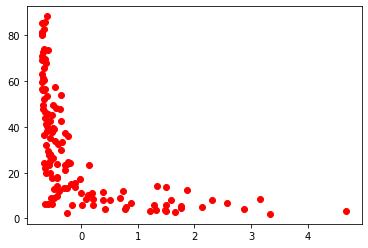

In [23]:
plt.scatter(df_features_z['GDP per capita'], df_target['Food Insecurity'], color='red')

There is a possible y = 1/x relationship between food insecurity and GDP per capita.

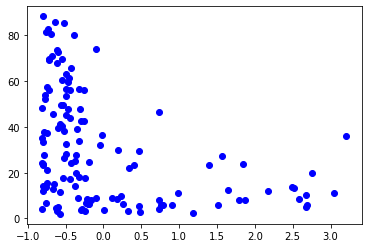

In [24]:
plt.scatter(df_features_z['Food production per capita'], df_target['Food Insecurity'], color='blue')

No clear relationship between food insecurity and Food production per capita.

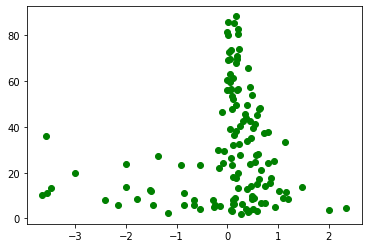

In [25]:
plt.scatter(df_features_z['Net imports per capita'], df_target['Food Insecurity'], color='green')

No clear relationship between Net imports per capita and Food insecurity

In [26]:
## trying out linear regression model
## prepare features
X = prepare_feature(df_features_z)
target = prepare_target(df_target)

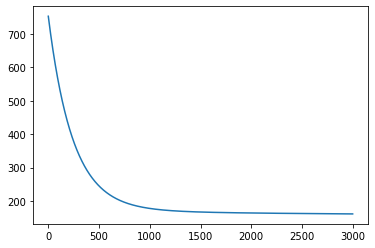

In [27]:
beta = np.zeros((4,1))
alpha = 0.002
n_iterations = 3000

beta, J_storage = gradient_descent(X, target, beta, alpha, n_iterations)

plt.plot(range(n_iterations), J_storage)

<h2>Model 1</h2>
<h3>All features are linearly correlated with target, no assumptions about independence of features.</h3>

In [28]:
## split the data into training and test sets
df_features_train, df_feature_test, df_target_train, df_target_test = split_data(df_features_z, df_target, test_size=0.2)

## normalize the training features
df_features_train_z = normalize_z(df_features_train)

X_train = prepare_feature(df_features_train_z)
target_train = prepare_target(df_target_train)

print(X_train.shape)
print(target_train.shape)


(104, 4)
(104, 1)


In [29]:
iterations = 1500
alpha = 0.01
beta = np.zeros((4,1))

# Call the gradient_descent function
beta, J_storage = gradient_descent(X_train, target_train, beta, alpha, iterations)

# call the predict() method
pred = predict(df_feature_test, beta)

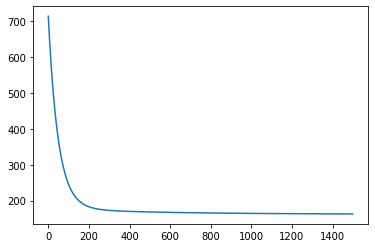

In [30]:
plt.plot(range(iterations), J_storage)

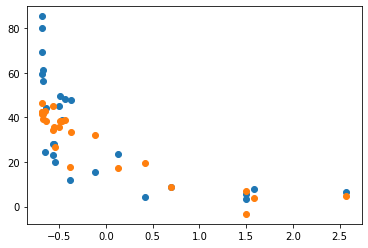

In [31]:
plt.scatter(df_feature_test['GDP per capita'], df_target_test)
plt.scatter(df_feature_test['GDP per capita'], pred)

In [32]:
## finding the mean square error and r2 score

target_test = prepare_target(df_target_test)

mse = mean_squared_error(target_test, pred)

r2_score(target_test, pred)

print('beta : ', beta)

print('Mean squared error: ', mse)
print('R2 score: ', r2_score(target_test, pred))

## first model is complete

beta :  [[ 29.54037624]
 [ -9.87915396]
 [-14.76717943]
 [ -9.29442333]]
Mean squared error:  [270.53493797]
R2 score:  [0.52677673]


<h2>Model 2:</h2>
<h3>GDP per capita is inversely proportional to food insecurity, the rest is linearly correlated.</h3>

In [33]:
df_all.head()

,Area Code (M49),Year,Food Insecurity,GDP,Population,Food Production,Imports,Exports,Net imports,Food production per capita,Net imports per capita,GDP per capita
0,4,2019,63.1,18904.490263,37212.970,5583461.0,682433.0,12939.0,669494.0,150.040725,17.990878,0.508008
1,8,2019,33.8,15400.237155,2875.637,666065.0,356140.0,18.0,356122.0,231.623463,123.841083,5.355418
2,12,2019,17.6,171158.234285,42319.750,5633586.0,11385668.0,328.0,11385340.0,133.119548,269.031362,4.044406
3,24,2019,73.5,89417.189120,31808.179,2920433.0,828554.0,1978.0,826576.0,91.813901,25.986272,2.811138
4,32,2019,35.8,445445.254556,44582.599,84534610.0,24868.0,49811872.0,-49787004.0,1896.134633,-1116.736241,9.991460


In [34]:
def transform_1_over_x(dfin, column_name):
    '''input: dfin, column_name
    output: dfin
    creates a new column with the name '1/column_name'
    '''
    dfin['1/' + column_name] = 1 / dfin[column_name]
    return dfin

In [35]:
## get the transformed values for GDP per capita and food production per capita
df_all_transformed = transform_1_over_x(df_all, 'GDP per capita')
df_all_transformed = transform_1_over_x(df_all_transformed, 'Food production per capita')

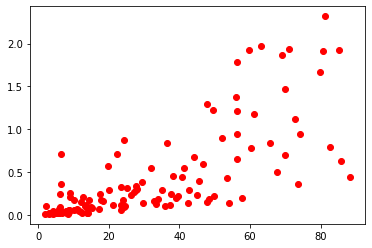

In [36]:
plt.scatter(df_all_transformed['Food Insecurity'], df_all_transformed['1/GDP per capita'], color='red')

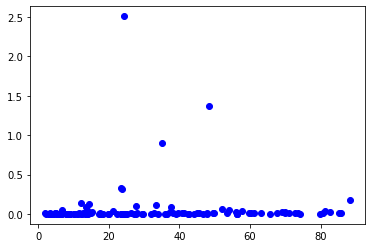

In [37]:
plt.scatter(df_all_transformed['Food Insecurity'], df_all_transformed['1/Food production per capita'], color='blue')

Unclear y = 1/x relationship between food insecurity and food production per capita

In [38]:
df_all_transformed.head()

,Area Code (M49),Year,Food Insecurity,GDP,Population,Food Production,Imports,Exports,Net imports,Food production per capita,Net imports per capita,GDP per capita,1/GDP per capita,1/Food production per capita
0,4,2019,63.1,18904.490263,37212.970,5583461.0,682433.0,12939.0,669494.0,150.040725,17.990878,0.508008,1.968473,0.006665
1,8,2019,33.8,15400.237155,2875.637,666065.0,356140.0,18.0,356122.0,231.623463,123.841083,5.355418,0.186727,0.004317
2,12,2019,17.6,171158.234285,42319.750,5633586.0,11385668.0,328.0,11385340.0,133.119548,269.031362,4.044406,0.247255,0.007512
3,24,2019,73.5,89417.189120,31808.179,2920433.0,828554.0,1978.0,826576.0,91.813901,25.986272,2.811138,0.355728,0.010892
4,32,2019,35.8,445445.254556,44582.599,84534610.0,24868.0,49811872.0,-49787004.0,1896.134633,-1116.736241,9.991460,0.100085,0.000527


In [39]:
features = ['1/GDP per capita', 'Food production per capita', 'Net imports per capita']
target = ['Food Insecurity']
df_features, df_target = get_features_targets(df_all_transformed, features, target)

df_features.head()

,1/GDP per capita,Food production per capita,Net imports per capita
0,1.968473,150.040725,17.990878
1,0.186727,231.623463,123.841083
2,0.247255,133.119548,269.031362
3,0.355728,91.813901,25.986272
4,0.100085,1896.134633,-1116.736241


In [40]:
df_feature_train, df_feature_test, df_target_train, df_target_test = split_data(df_features, df_target, test_size=0.2)
df_feature_train_z = normalize_z(df_feature_train)
df_feature_test_z = normalize_z(df_feature_test)

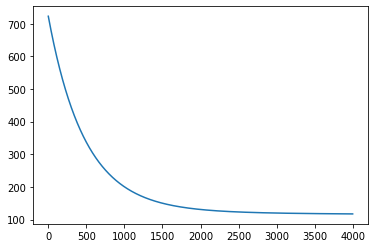

In [41]:
## train the model
X_train = prepare_feature(df_feature_train_z)
target_train = prepare_target(df_target_train)

iterations = 4000
alpha = 0.001
beta = np.zeros((4,1))

# Call the gradient_descent function
beta, J_storage = gradient_descent(X_train, target_train, beta, alpha, iterations)

plt.plot(range(iterations), J_storage)

# call the predict() method
pred = predict(df_feature_test, beta)

# print(pred)

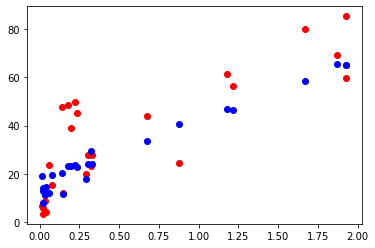

In [42]:
plt.scatter(df_feature_test['1/GDP per capita'], df_target_test, color='red')
plt.scatter(df_feature_test['1/GDP per capita'], pred, color='blue')

In [43]:
## finding the mean square error and r2 score

target_test = prepare_target(df_target_test)

mse = mean_squared_error(target_test, pred)

R2 = r2_score(target_test, pred)

print('beta : ', beta)

print('Mean squared error: ', mse)
print('R2 score: ', R2)

## second model is complete

beta :  [[29.00041534]
 [15.56604499]
 [-7.58034025]
 [-4.46299718]]
Mean squared error:  [192.92827966]
R2 score:  [0.66252732]


<h2>Analysis</h2>

Model and Metrics before transformation:<br>
Y = 29.5403762 + -9.87915396 X<sub>1</sub> + -14.76717943 X<sub>2</sub> + -9.29442333 X<sub>3</sub><br>
Mean squared error:  [270.53493797]<br>
R2 score:  [0.52677673]

The first model shows that when GDP, Food production and Food imports decrease, the prevalence of moderate and severe food insecurity will increase.<br>
The coefficients also imply that the Production of food is the most significant factor in affecting food insecurity, hence we have decided to focus<br>
on that in notebook 2.

Model and Metrics after transformation:<br>
Y = 29.00041534 + 15.56604499 X<sub>1</sub> + -7.58034025 X<sub>2</sub> + -4.46299718 X<sub>3</sub><br>
Mean squared error:  [192.92827966]<br>
R2 score:  [0.66252732]

To achieve a higher R2 score, we have transformed the GDP to better fit a linear curve, hence this was evidently a success as the R2 score increased

<p class='centre>Bibiliography</p><br>
data taken from https://www.fao.org/faostat/en/#data

Bibliography<br>
https://www.fao.org/faostat/en/#data